In [1]:
def get_curr_dur():
    import os
    a = os.getcwd()
    return print(f'Current working directory is:{a}')
get_curr_dur()

Current working directory is:/Users/jakepulitzer/GitHub/python-notebooks


In [2]:
# relativedelta for date relative to today
import pandas as pd
from dateutil.relativedelta import *
from datetime import datetime, timedelta, date

# get todays date
end_date = pd.to_datetime(date.today())
start_date = pd.to_datetime('2020-01-01')
print('Start Date:',start_date,"----->  End Date:",end_date)

Start Date: 2020-01-01 00:00:00 ----->  End Date: 2023-08-15 00:00:00


In [3]:
# !pip install yfinance --upgrade

In [4]:
# must re pip yfinance every time you run the notebook
# !pip install yfinance
import yfinance as yf
import pandas as pd

my_tickers = input('Input ticker\'s here:\n')

# df = yf.download(
#     tickers = my_tickers,
#     period='7d', # valid intervals: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,msx
#     interval='30m' # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
#     )

ticker_list = my_tickers.split(', ')
print(ticker_list)

data = yf.download(
    
    tickers= ticker_list,
    
    group_by= 'ticker',
    
    period='5y',
    
    interval='1d'

)


# count = 0
# list_of_dfs = []
# data = {'Ticker':[],
#     'Open (7 Days Ago)':[],
#     'Close (Yesterday)':[],
#     '7DayChange':[],
#     'Report Date':[]}
# df_out = pd.DataFrame(data)

# for aticker in ticker_list:
#     count = count + 1
#     astr = str(count)
#     adf = 'df'+astr
#     adf = yf.download(
#         tickers = aticker,
#         period='7d',
#         interval='30m'
#     )
#     close = adf.loc[adf.index.max()]['Close']
#     open = adf.loc[adf.index.min()]['Open']
#     diff = close - open

#     ticker = aticker
#     data = {
#         'Ticker':[ticker],
#         'Open (7 Days Ago)':[open],
#         'Close (Yesterday)':[close],
#         '7DayChange':[diff],
#         'Report Date':[end_date]}

#     new_row = pd.DataFrame(data)
#     df_out = pd.concat([df_out, new_row], ignore_index=True)
#     print(count)
#     # print("Ticker:",aticker, "\nMost recent stock price:",df.loc[df.index.max()]['Close'])
# print('Data:')
# df_out

Input ticker's here:
AAPL, TSLA, META, AMZN
['AAPL', 'TSLA', 'META', 'AMZN']
[*********************100%%**********************]  4 of 4 completed


In [5]:
ticker_list

['AAPL', 'TSLA', 'META', 'AMZN']

In [6]:
def curr_price(ticker, price_option):
    '''
    Function returns most recent close or open price of stock of interest.
    
    ticker = ticker you want to see
    price_option = close or open
    
    '''
    close = data[ticker].loc[data[ticker].index.max()][price_option]
    return close
    

In [7]:
for t in ticker_list:
    print('Last closing price of',t,":",curr_price(t, 'Close'))

Last closing price of AAPL : 177.4499969482422
Last closing price of TSLA : 232.9600067138672
Last closing price of META : 301.95001220703125
Last closing price of AMZN : 137.6699981689453


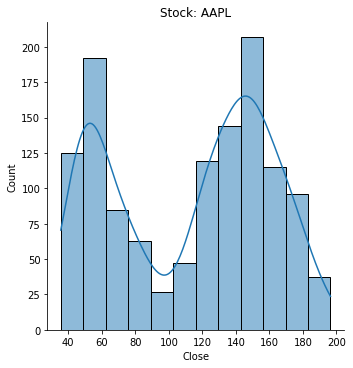

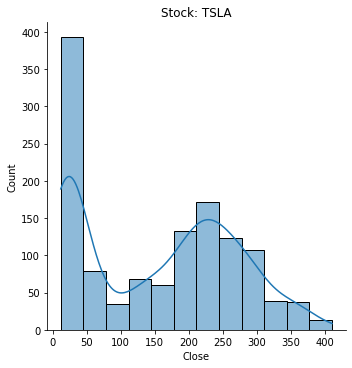

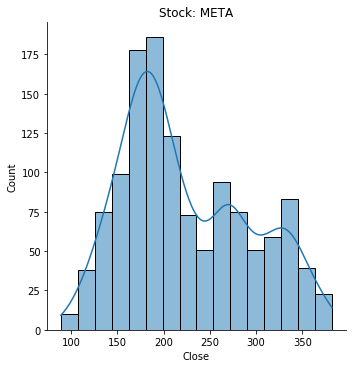

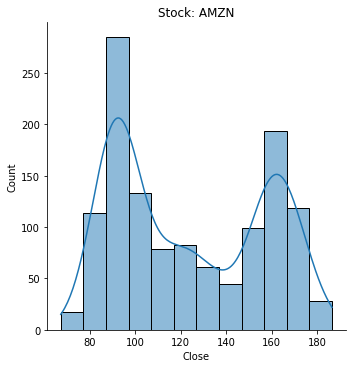

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
for t in ticker_list:
    sns.displot(data= data[t]['Close'], kde=True)
    plt.title("Stock: "+t)

In [9]:
data['META'].index

DatetimeIndex(['2018-08-16', '2018-08-17', '2018-08-20', '2018-08-21',
               '2018-08-22', '2018-08-23', '2018-08-24', '2018-08-27',
               '2018-08-28', '2018-08-29',
               ...
               '2023-08-02', '2023-08-03', '2023-08-04', '2023-08-07',
               '2023-08-08', '2023-08-09', '2023-08-10', '2023-08-11',
               '2023-08-14', '2023-08-15'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


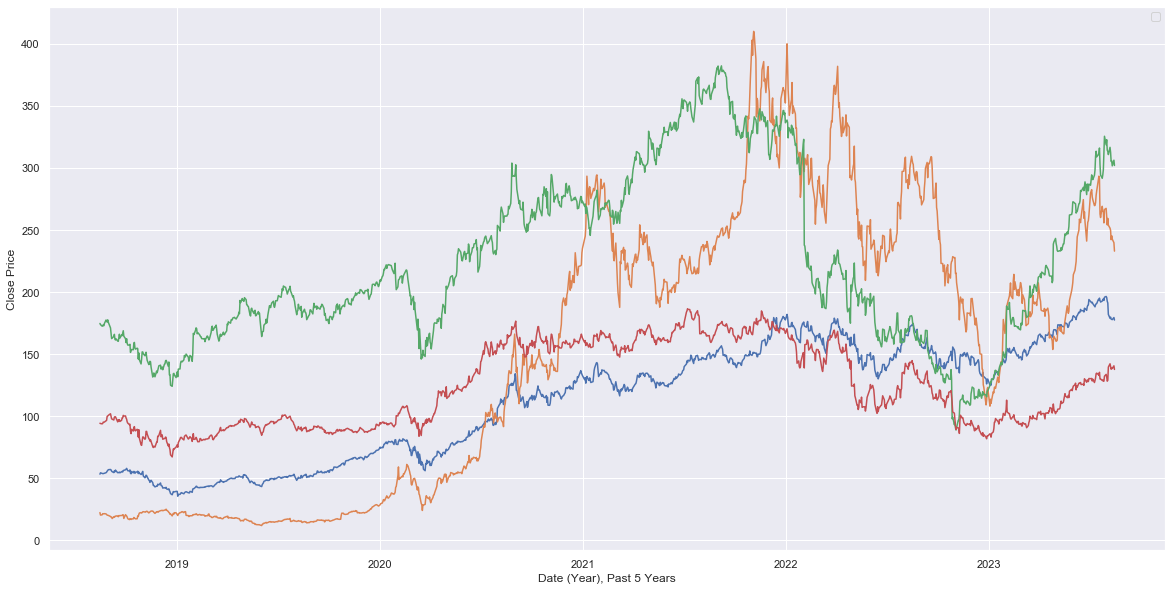

In [10]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(20,10))

for t in ticker_list:
    sns.lineplot(x=data[t].index, y=data[t]['Close'], data=data[t])
    plt.legend()
    plt.ylabel('Close Price')
    plt.xlabel('Date (Year), Past 5 Years')

In [11]:
data

AMZN                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2018-08-16   95.196999   95.250000   94.177498   94.325996   94.325996   
2018-08-17   94.290001   94.400002   92.777496   94.111000   94.111000   
2018-08-20   94.528503   94.587502   93.303001   93.835503   93.835503   
2018-08-21   94.000000   94.887497   93.720497   94.170998   94.170998   
2018-08-22   93.832001   95.290001   93.832001   95.245003   95.245003   
...                ...         ...         ...         ...         ...   
2023-08-09  139.970001  140.320007  137.100006  137.850006  137.850006   
2023-08-10  139.070007  140.410004  137.490005  138.559998  138.559998   
2023-08-11  137.399994  139.330002  137.000000  138.410004  138.410004   
2023-08-14  138.300003  140.589996  137.750000  140.570007  140.570007   
2023-08-15  140.050003  141.279999  137.229996  137.669998  137.669998   

                            AAPL                                      ...  \
              Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2018-08-16  79142000   52.937500   53.452499   52.867500   53.330002  ...   
2018-08-17  82086000   53.360001   54.487499   53.290001   54.395000  ...   
2018-08-20  57240000   54.525002   54.794998   53.777500   53.865002  ...   
2018-08-21  62112000   54.200001   54.297501   53.507500   53.759998  ...   
2018-08-22  61610000   53.525002   54.090000   53.459999   53.762501  ...   
...              ...         ...         ...         ...         ...  ...   
2023-08-09  50017300  180.869995  180.929993  177.009995  178.190002  ...   
2023-08-10  58928400  179.479996  180.750000  177.600006  177.970001  ...   
2023-08-11  42832100  177.320007  178.619995  176.550003  177.789993  ...   
2023-08-14  47148700  177.970001  179.690002  177.309998  179.460007  ...   
2023-08-15  42706600  178.880005  179.479996  177.050003  177.449997  ...   

                  META                                          TSLA  \
                   Low       Close   Adj Close    Volume        Open   
Date                                                                   
2018-08-16  174.009995  174.699997  174.699997  31351800   22.660667   
2018-08-17  172.039993  173.800003  173.800003  24893200   21.566668   
2018-08-20  170.910004  172.500000  172.500000  21518000   19.446667   
2018-08-21  171.389999  172.619995  172.619995  19578500   20.707333   
2018-08-22  172.130005  173.639999  173.639999  16894100   21.391333   
...                ...         ...         ...       ...         ...   
2023-08-09  302.850006  305.209991  305.209991  19955800  250.869995   
2023-08-10  303.869995  305.739990  305.739990  14358900  245.399994   
2023-08-11  300.359985  301.640015  301.640015  13967800  241.770004   
2023-08-14  298.250000  306.190002  306.190002  15641900  235.699997   
2023-08-15  300.029999  301.950012  301.950012  11586300  238.729996   

                                                                       
                  High         Low       Close   Adj Close     Volume  
Date                                                                   
2018-08-16   22.818666   22.254667   22.363333   22.363333   90960000  
2018-08-17   21.784666   20.235332   20.366667   20.366667  284379000  
2018-08-20   20.566668   19.213333   20.562668   20.562668  261034500  
2018-08-21   21.652666   20.600000   21.459999   21.459999  197583000  
2018-08-22   21.591999   20.978001   21.442667   21.442667   89190000  
...                ...         ...         ...         ...        ...  
2023-08-09  251.100006  241.899994  242.190002  242.190002  101596300  
2023-08-10  251.800003  243.000000  245.339996  245.339996  109498600  
2023-08-11  243.789993  238.020004  242.649994  242.649994   98866600  
2023-08-14  240.660004  233.7

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2018-08-16 to 2023-08-15
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (AMZN, Open)       1257 non-null   float64
 1   (AMZN, High)       1257 non-null   float64
 2   (AMZN, Low)        1257 non-null   float64
 3   (AMZN, Close)      1257 non-null   float64
 4   (AMZN, Adj Close)  1257 non-null   float64
 5   (AMZN, Volume)     1257 non-null   int64  
 6   (AAPL, Open)       1257 non-null   float64
 7   (AAPL, High)       1257 non-null   float64
 8   (AAPL, Low)        1257 non-null   float64
 9   (AAPL, Close)      1257 non-null   float64
 10  (AAPL, Adj Close)  1257 non-null   float64
 11  (AAPL, Volume)     1257 non-null   int64  
 12  (META, Open)       1257 non-null   float64
 13  (META, High)       1257 non-null   float64
 14  (META, Low)        1257 non-null   float64
 15  (META, Close)      1257 non-null   float64
 16  (META,

In [13]:
close_vals = pd.DataFrame({
    'META':data[('META', 'Close')],
    'TSLA':data[('TSLA', 'Close')],
    'AAPL':data[('AAPL', 'Close')],
    'AMZN':data[('AMZN', 'Close')]
})
close_vals.tail()

META        TSLA        AAPL        AMZN
Date                                                      
2023-08-09  305.209991  242.190002  178.190002  137.850006
2023-08-10  305.739990  245.339996  177.970001  138.559998
2023-08-11  301.640015  242.649994  177.789993  138.410004
2023-08-14  306.190002  239.759995  179.460007  140.570007
2023-08-15  301.950012  232.960007  177.449997  137.669998

In [14]:
un_pivot = close_vals
un_pivot.reset_index(inplace=True)
un_pivot = pd.melt(close_vals,
                  id_vars = 'Date',
                  value_vars = ['META', 'TSLA', 'AAPL', 'AMZN'])

In [15]:
un_pivot

Date variable       value
0    2018-08-16     META  174.699997
1    2018-08-17     META  173.800003
2    2018-08-20     META  172.500000
3    2018-08-21     META  172.619995
4    2018-08-22     META  173.639999
...         ...      ...         ...
5023 2023-08-09     AMZN  137.850006
5024 2023-08-10     AMZN  138.559998
5025 2023-08-11     AMZN  138.410004
5026 2023-08-14     AMZN  140.570007
5027 2023-08-15     AMZN  137.669998

[5028 rows x 3 columns]

Text(0.5, 0, 'Date (Year), Past 5 Years')

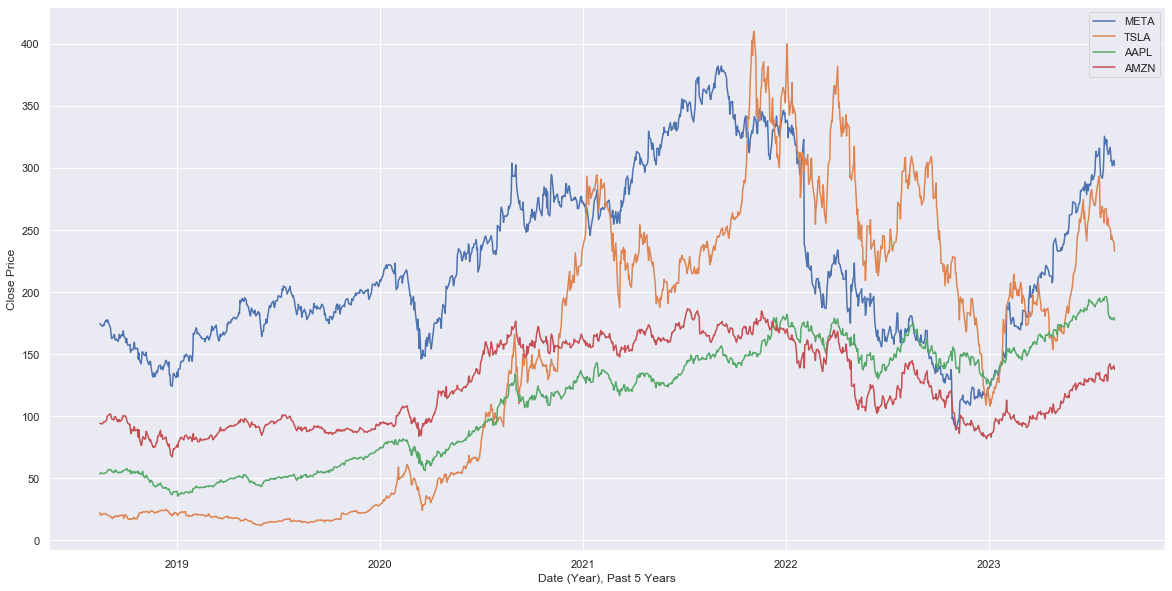

In [16]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='value', data=un_pivot, hue='variable')
plt.legend()
plt.ylabel('Close Price')
plt.xlabel('Date (Year), Past 5 Years')

In [17]:
# delta = close_vals['META'].diff()
# up = delta.clip(lower=0)
# down = -1*delta.clip(upper=0)
# ema_up = up.ewm(com=13, adjust=False).mean()
# ema_down = down.ewm(com=13, adjust=False).mean()
# rs = ema_up/ema_down
# close_vals['rsi meta'] = 100 - (100/(1+rs))

In [18]:
def rsi(df, ticker):
    delta = df[ticker].diff()
    period=14
    gain = delta.where(delta>0, 0)
    loss = -delta.where(delta<0,0)
    avg_gain = gain.rolling(period).mean()
    avg_loss = loss.rolling(period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
#     down = -1*delta.clip(upper=0)
#     ema_up = up.ewm(com=13, adjust=False).mean()
#     ema_down = down.ewm(com=13, adjust=False).mean()
#     rs = ema_up/ema_down
    new_field_name = 'rsi_'+ticker
    df[new_field_name]= 100 - (100 /(1+rs) )
    return df

In [19]:
close_vals

Date        META        TSLA        AAPL        AMZN
0    2018-08-16  174.699997   22.363333   53.330002   94.325996
1    2018-08-17  173.800003   20.366667   54.395000   94.111000
2    2018-08-20  172.500000   20.562668   53.865002   93.835503
3    2018-08-21  172.619995   21.459999   53.759998   94.170998
4    2018-08-22  173.639999   21.442667   53.762501   95.245003
...         ...         ...         ...         ...         ...
1252 2023-08-09  305.209991  242.190002  178.190002  137.850006
1253 2023-08-10  305.739990  245.339996  177.970001  138.559998
1254 2023-08-11  301.640015  242.649994  177.789993  138.410004
1255 2023-08-14  306.190002  239.759995  179.460007  140.570007
1256 2023-08-15  301.950012  232.960007  177.449997  137.669998

[1257 rows x 5 columns]

In [20]:
for t in ticker_list:
    rsi(close_vals, t)
close_vals.tail()

Date        META        TSLA        AAPL        AMZN   rsi_AAPL  \
1252 2023-08-09  305.209991  242.190002  178.190002  137.850006  23.715673   
1253 2023-08-10  305.739990  245.339996  177.970001  138.559998  24.553715   
1254 2023-08-11  301.640015  242.649994  177.789993  138.410004  22.110345   
1255 2023-08-14  306.190002  239.759995  179.460007  140.570007  24.366432   
1256 2023-08-15  301.950012  232.960007  177.449997  137.669998  20.347837   

       rsi_TSLA   rsi_META   rsi_AMZN  
1252  35.746736  51.583659  62.355160  
1253  39.934177  57.435219  63.128840  
1254  30.163728  56.376373  65.229808  
1255  30.572463  57.294007  67.136026  
1256  28.064283  52.099906  63.484436

In [21]:
close_vals.set_index('Date', inplace=True);close_vals.head()

META       TSLA       AAPL       AMZN  rsi_AAPL  rsi_TSLA  \
Date                                                                          
2018-08-16  174.699997  22.363333  53.330002  94.325996       NaN       NaN   
2018-08-17  173.800003  20.366667  54.395000  94.111000       NaN       NaN   
2018-08-20  172.500000  20.562668  53.865002  93.835503       NaN       NaN   
2018-08-21  172.619995  21.459999  53.759998  94.170998       NaN       NaN   
2018-08-22  173.639999  21.442667  53.762501  95.245003       NaN       NaN   

            rsi_META  rsi_AMZN  
Date                            
2018-08-16       NaN       NaN  
2018-08-17       NaN       NaN  
2018-08-20       NaN       NaN  
2018-08-21       NaN       NaN  
2018-08-22       NaN       NaN

AAPL


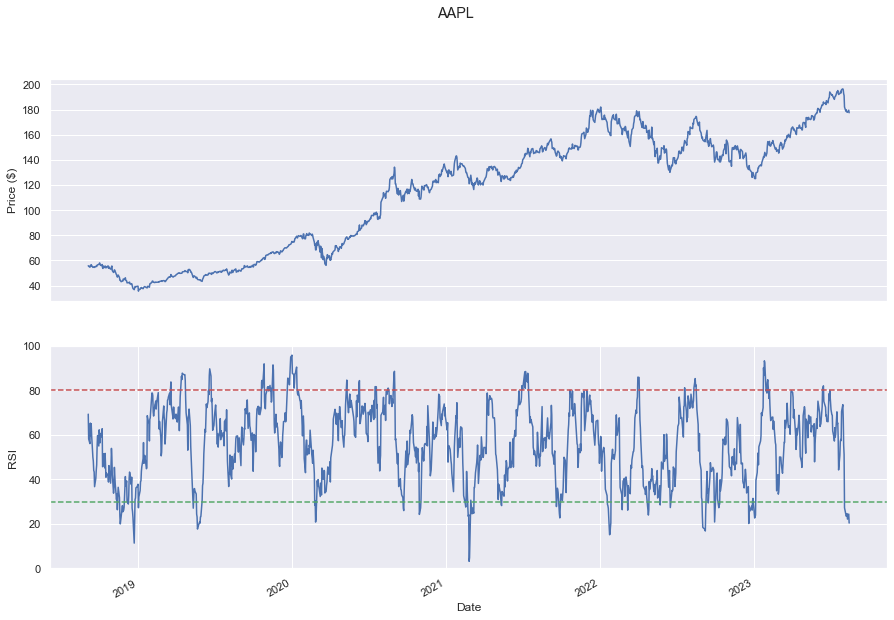

TSLA


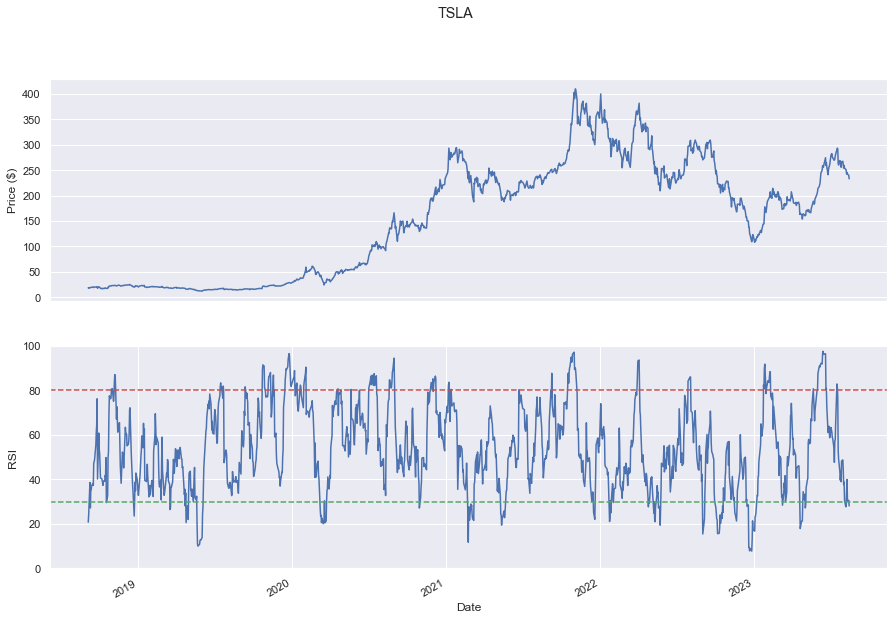

META


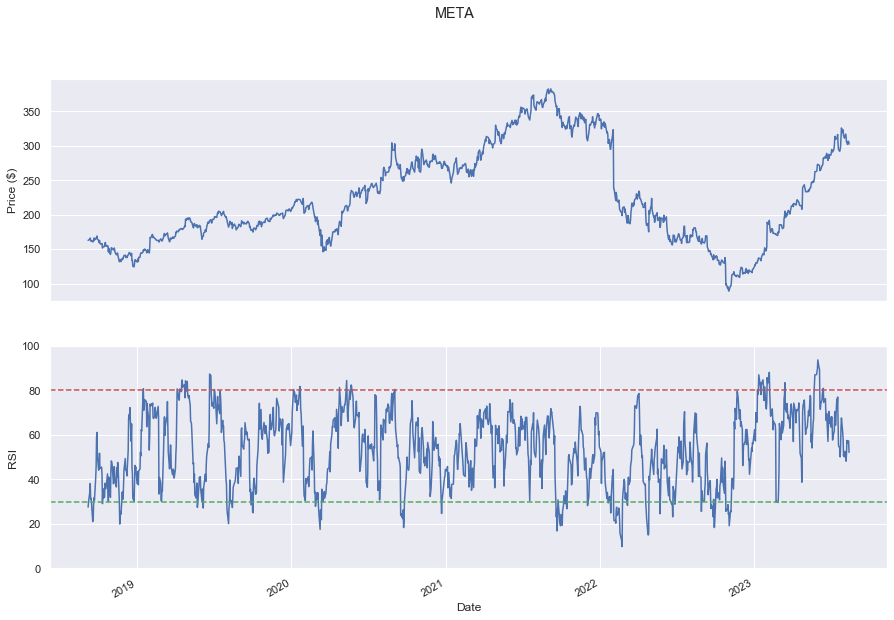

AMZN


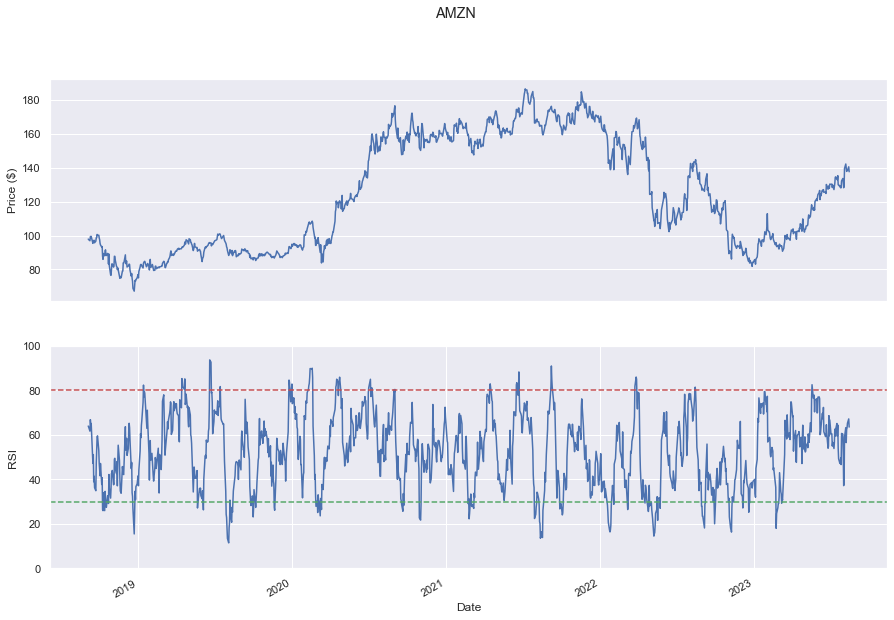

In [23]:
for t in ticker_list:
    print(t)
    close_vals2 = close_vals.iloc[14:]
    fig, (ax1, ax2) = plt.subplots(2)
    ax1.get_xaxis().set_visible(False)
    fig.suptitle(t)
    close_vals2[t].plot(ax=ax1)
    ax1.set_ylabel('Price ($)')
    rsi_t = 'rsi_'+t
    close_vals2[rsi_t].plot(ax=ax2)
    ax2.set_ylim(0, 100)
    ax2.axhline(30, color='g', linestyle='--')
    ax2.axhline(80, color='r', linestyle='--')
    ax2.set_ylabel('RSI')
    fig.set_size_inches(15, 10)
    plt.show()


In [24]:
close_vals.tail()

META        TSLA        AAPL        AMZN   rsi_AAPL  \
Date                                                                    
2023-08-09  305.209991  242.190002  178.190002  137.850006  23.715673   
2023-08-10  305.739990  245.339996  177.970001  138.559998  24.553715   
2023-08-11  301.640015  242.649994  177.789993  138.410004  22.110345   
2023-08-14  306.190002  239.759995  179.460007  140.570007  24.366432   
2023-08-15  301.950012  232.960007  177.449997  137.669998  20.347837   

             rsi_TSLA   rsi_META   rsi_AMZN  
Date                                         
2023-08-09  35.746736  51.583659  62.355160  
2023-08-10  39.934177  57.435219  63.128840  
2023-08-11  30.163728  56.376373  65.229808  
2023-08-14  30.572463  57.294007  67.136026  
2023-08-15  28.064283  52.099906  63.484436

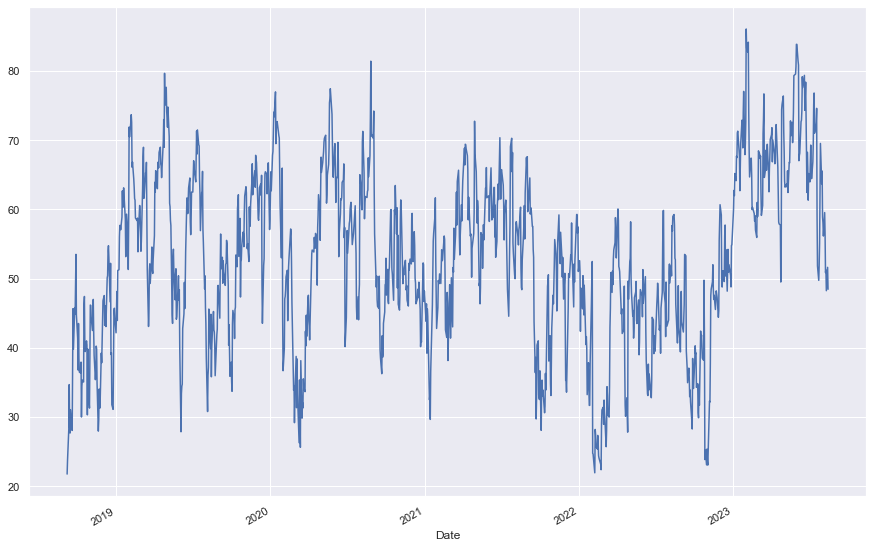

In [30]:
import pandas_ta as pta
plt.figure(figsize=(15,10))
rsi = pta.rsi(close_vals['META'], length=14)
rsi[14:].plot()
plt.show()

In [26]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218924 sha256=3dd4c8c06d284c0d0d8c0d4d5e7280e87f46e11f7b1b0859fc319677c27aadd2
  Stored in directory: /Users/jakepulitzer/Library/Caches/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas_ta
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
